# Welter



Tuesday, June 21, 2016  

## Grankin et al. data

part 1

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [3]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('paper', font_scale=1.4)
sns.set_style('ticks')

In [4]:
import pandas as pd

## Download the data

http://cdsweb.u-strasbg.fr/cgi-bin/qcat?J/A+A/479/827

In [5]:
! wc ../data/photometry/J_A+A_479_827/phot/lkca4.dat

     284    1420   11928 ../data/photometry/J_A+A_479_827/phot/lkca4.dat


In [6]:
! head -n 3 ../data/photometry/J_A+A_479_827/phot/lkca4.dat

In [7]:
! tail -n 3 ../data/photometry/J_A+A_479_827/phot/lkca4.dat

In [8]:
cols = ['HJD', 'Vmag', 'U_B', 'B_V', 'V_R']

In [9]:
grankin_data = pd.read_csv('../data/photometry/J_A+A_479_827/phot/lkca4.dat', na_values=9.999,
                           names=cols, delim_whitespace=True)
grankin_data.head()

,HJD,Vmag,U_B,B_V,V_R
0,2.448858e+06,12.613,NaN,1.441,NaN
1,2.448859e+06,12.336,NaN,1.400,NaN
2,2.448860e+06,12.702,NaN,1.481,NaN
3,2.448861e+06,12.696,NaN,1.418,NaN
4,2.448862e+06,12.334,NaN,1.409,NaN


In [10]:
grankin_data.to_csv('../data/photometry/LkCa4_grankin.dat', index=False)

## Phase up the NIRSPEC spectra

In [14]:
nirspec_date = 2452606.500000

(2452540, 2452640)

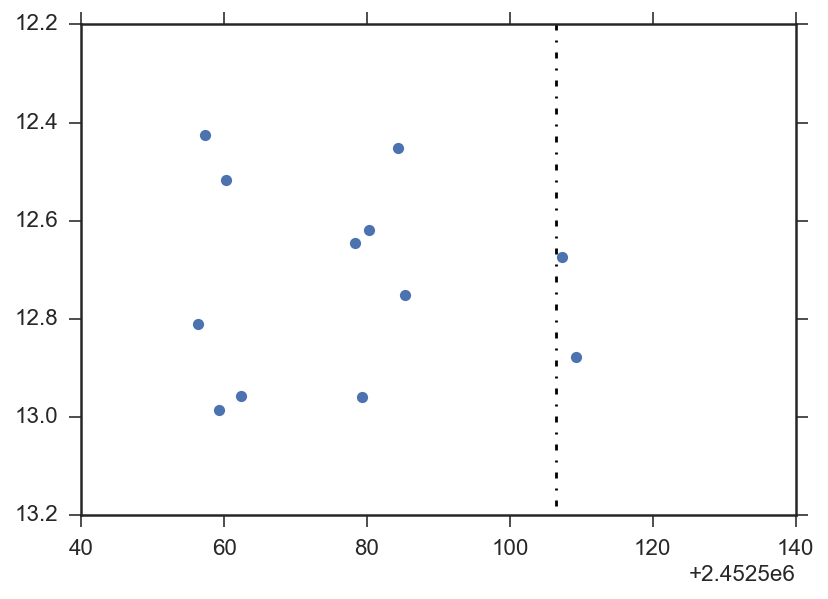

In [23]:
plt.plot(grankin_data.HJD, grankin_data.Vmag, 'o')

plt.vlines(nirspec_date, 12.2, 13.5, linestyles='dashdot', colors='black', label='NIRSPEC spectrum')

plt.ylim(13.2, 12.2)
plt.xlim(2452540, 2452640)

In [28]:
gr_subset = (grankin_data.HJD > 2452540) & (grankin_data.HJD < 2452640)
grs = grankin_data[gr_subset]

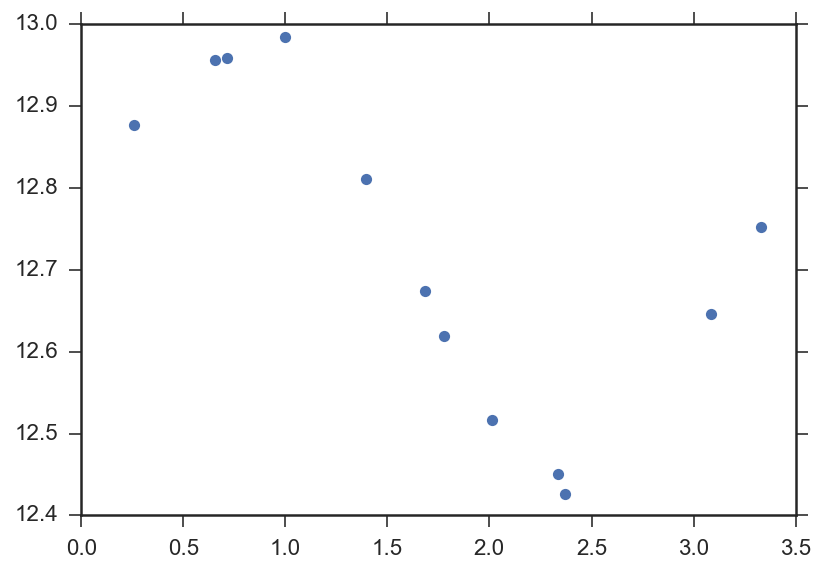

In [35]:
P_fit = 3.3749114970499017
phased = np.mod(grs.HJD, P_fit)
phased_NIRSPEC = np.mod(nirspec_date, P_fit)

plt.plot(phased, grs.Vmag, 'o')

#plt.ylim(13.0, 12.4)
#plt.vlines(phased_NIRSPEC, 12.4, 13.0, linestyles='dashed');

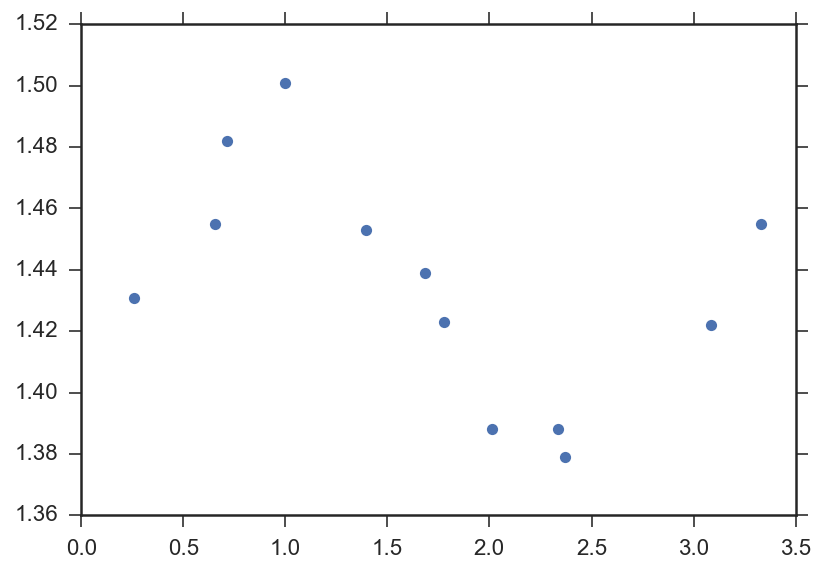

In [36]:
P_fit = 3.3749114970499017
phased = np.mod(grs.HJD, P_fit)
phased_NIRSPEC = np.mod(nirspec_date, P_fit)

plt.plot(phased, grs.V_R, 'o')

#plt.ylim(13.0, 12.4)
#plt.vlines(phased_NIRSPEC, 12.4, 13.0, linestyles='dashed');